# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should export the notebook to a Python script (``File >> Download as >> Python (.py)``). Make sure that the resulting script includes all code written in the tasks marked as "**Activity n. N**", together with any replies to specific questions posed. Your file should be named `padi-labKK-groupXXX.py`, where `KK` corresponds to the lab number and the `XXX` corresponds to your group number. Similarly, your homework should consist of a single pdf file named `padi-hwKK-groupXXX.pdf`. You should create a zip file with the lab and homework files and submit it in Fenix **at most 30 minutes after your lab is over**.

Make sure to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The Markov chain model

Consider once again the garbage collection problem described in the Homework and for which you wrote a Markov chain model. In this lab, you will consider a larger version of the same problem, described by the diagram:

<img width="600" src="garbage.png">

Recall that your chain should describe the motion of the garbage truck moving in the environment, where: 

* The truck stops are numbered from 0 to 45, as indicated by the numbers;
* Stop n. 0 corresponds to the recycling plant;
* In each step, the truck is in one of the 46 stops; at the next time step, it will move to one of the adjacent stops with equal probability.

In this first activity, you will implement your Markov chain model in Python. You will start by loading the transition probability matrix from a `numpy` binary file, using the `numpy` function `load`. You will then consider the state space to consist of all possible stops in the environment, each represented as a string. For example, if the environment has 10 stops, the states should include the strings `'0'` to `'9'`. 

---

#### Activity 1.        

Write a function named `load_chain` that receives, as input, a string corresponding to the name of a file containing a transition probability matrix for some garbage collection circuit to be loaded and returns, as output, a two-element tuple corresponding to the Markov chain that describes the movement of the truck, where:

* ... the first element is a tuple containing an enumeration of the state-space (i.e., each element of the tuple corresponds to a state of the chain, represented as a string).
* ... the second element is a `numpy` array corresponding to the transition probability matrix for the chain.

---

In [102]:
# Insert your code here.
import numpy as np

def load_chain(filename):
    trans_matrix = np.load(filename)
    states = []
    counter = 0
    for i in trans_matrix[0]:
        states.append(str(counter))
        counter += 1
    
    output = (states, trans_matrix)

    return output

Number of states: 46


We provide below an example of application of the function, that you can use as a first "sanity check" for your code. Note, however, that the fact that you can replicate the examples below is not indicative that your code is correct. 

The file used in the example contains the transition probability matrix for the road network in the diagram above. However, your code will be tested with networks of different sizes, so **make sure not to hard-code the size of the environment into your code**.

```python
M = load_chain('garbage-big.npy')

print('Number of states:', len(M[0]))
print('Type of states:', type(M[0][0]))
print('First state:', M[0][0])
print('\nTransition probability matrix (type):', type(M[1]))
print('Transition probability matrix (dimension):', M[1].shape)```

Output:
```
Number of states: 46
Type of states: <class 'str'>
First state: 0

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (46, 46)
```

**Note:** For debug purposes, we also provide a second file, `garbage-small.npy`, that contains a 3-state Markov chain that you can use to easily verify if your results make sense.

In the next activity, you will use the Markov chain model to evaluate the likelihood of any given path for the truck.

---

#### Activity 2.

Write a function `prob_trajectory` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a trajectory, corresponding to a sequence of states (i.e., a tuple or list of strings, each string corresponding to a state).

Your function should return, as output, a floating point number corresponding to the probability of observing the provided trajectory, taking the first state in the trajectory as initial state. 

---

In [55]:
# Insert your code here.

import numpy as np

def prob_trajectory(markov_chain, trajectory):
    trans_matrix = markov_chain[1]
    
    resulting_prob = 1

    for i in range(len(trajectory)):
        if i == len(trajectory) - 1: continue # skips last element in trajectory

        resulting_prob *= trans_matrix[int(trajectory[i])][int(trajectory[i + 1])]
        

    return resulting_prob


Prob. of trajectory 3-4-5-6-7-8: 0.004115226337448559
Prob. of trajectory 0-2-1-3: 0.0
Prob. of trajectory 19-30-31-41-35-34: 0.0023148148148148147
Prob. of trajectory 0-2-3-14-15-21: 0.009259259259259259


Example of application of the function with the chain $M$ from Activity 1.

```python
print("Prob. of trajectory 3-4-5-6-7-8:", prob_trajectory(M, ('3', '4', '5', '6', '7', '8')))
print("Prob. of trajectory 0-2-1-3:", prob_trajectory(M, ('0', '2', '1', '3')))
print("Prob. of trajectory 19-30-31-41-35-34:", prob_trajectory(M, ('19', '30', '31', '41', '35', '34')))
print("Prob. of trajectory 0-2-3-14-15-21:", prob_trajectory(M, ('0', '2', '3', '14', '15', '21')))
```

Output:
```
Prob. of trajectory 3-4-5-6-7-8: 0.004115226337448559
Prob. of trajectory 0-2-1-3: 0.0
Prob. of trajectory 19-30-31-41-35-34: 0.0023148148148148147
Prob. of trajectory 0-2-3-14-15-21: 0.009259259259259259
```

Note that your function should work with **any** Markov chain that is specified as a tuple like the one from Activity 1.

### 2. Stability

The next activities explore the notion of *stationary distribution* for the chain.

---

#### Activity 3

Write a function `stationary_dist` that receives, as input, a Markov chain in the form of a tuple like the one returned by the function in Activity 1. Your function should return, as output, a `numpy` array corresponding to a row vector containing the stationary distribution for the chain. What does this distribution tell you about how much time the truck spends in each location?

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*. You may also find useful the function `numpy.real` which returns the real part of a complex number.

---

In [59]:
# Insert your code here.
import numpy as np

def stationary_dist(markov_chain):
  P = markov_chain[1]

  # We want to solve (I - P).T * mu.T = 0 <-> A * mu = b
  A = (np.identity(len(markov_chain[0])) - P).T

  # We need to add a row of ones to A and a last one 1 to b to make mu1 + mu2 + ... = 1
  A[-1,:] = np.ones(len(markov_chain[0]))
  b = np.zeros(len(markov_chain[0]))
  b[-1] = 1

  pi = np.linalg.solve(A, b)

  return pi


Stationary distribution:
[0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.01 0.02 0.01 0.01 0.01
 0.02 0.03 0.03 0.02 0.02 0.05 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05
 0.01 0.04 0.04 0.04 0.04 0.01 0.01 0.05 0.01 0.04 0.04 0.01 0.04 0.04
 0.04 0.04 0.01 0.01]

Is u* * P = u*? True


<font color='blue'> The stationary distribution tells us, over a long period of time, the probability of the truck being in a given stop. That being said, it can also be used to predict where the truck will spend most of its time - the bigger the probability in the stationary distribution, the more time the truck spends in the corresponding stop. This is similar to how the Google's algorithm, PageRank, works.</font> 

Example of application of the function with the chain $M$ from Activity 1.

```python
u_star = stationary_dist(M)

print('Stationary distribution:')
print(np.round(u_star, 2))

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))
```

Output:
```
Stationary distribution:
[[0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.03 0.01 0.02 0.01 0.01 0.01
  0.02 0.03 0.03 0.02 0.02 0.05 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.05
  0.01 0.04 0.04 0.04 0.04 0.01 0.01 0.05 0.01 0.04 0.04 0.01 0.04 0.04
  0.04 0.04 0.01 0.01]]

Is u* * P = u*? True
```

To complement Activity 3, you will now empirically establish that the chain is ergodic, i.e., no matter where the truck starts, its visitation frequency will eventually converge to the stationary distribution.

---

#### Activity 4.

Write a function `compute_dist` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a numpy array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the truck is expected to take.

Your function should return, as output, a row vector (a `numpy` array) containing the distribution after $N$ steps of the chain. Use your function to justify that the chain is ergodic.

---

In [65]:
# Insert your code here.
import numpy as np

def compute_dist(markov_chain, init_dist, num_steps):
    exp_markov_chain = np.linalg.matrix_power(markov_chain[1], num_steps)

    return np.matmul(init_dist, exp_markov_chain)


Is u * P^100 = u*? False

Is u * P^2000 = u*? True


<font color='blue'>A chain is ergodic if, being irreducible and aperiodic, reaches its stationary distribution after enough time steps and for any given initial distribution. Like the markov chain described in the homework, we can easily infer this chain is also irreducible and aperiodic (for the reasons stated in the homework) - it is, therefore, a positive chain. This exercises allows to use random initial distributions to prove that, after enough time steps (in this case, around 2000 steps seem to be enough), the chain will always reach a stationary distribution, confirmed by verifying that u * P^2000 = u* is always true.  </font>

Example of application of the function with the chain $M$ from Activity 1.

```python
import numpy.random as rnd

# Number of states
nS = len(M[0])

rnd.seed(42)

# Initial random distribution
u = rnd.random((1, nS))
u = u / np.sum(u)

# Distrbution after 100 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 2000 steps
v = compute_dist(M, u, 2000)
print('\nIs u * P^2000 = u*?', np.all(np.isclose(v, u_star)))
```

Output:
```
Is u * P^100 = u*? False

Is u * P^2000 = u*? True
```

### 3. Simulation

In this part of the lab, you will *simulate* the actual movement of the truck, and empirically compute the visitation frequency of each state.

---

#### Activity 5

Write down a function `simulate` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a `numpy` array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the truck is expected to take.

Your function should return, as output, a tuple containing a trajectory with $N$ states, obtained from the initial distribution provided. Each element in the tuple should be a string corresponding to a state index.

---

**Note:** You may find useful to import the numpy module `numpy.random`.

In [111]:
# Insert your code here.
import numpy as np
import numpy.random as rand

def simulate(markov_chain, init_dist, num_steps):
    trajectory = []
    next_dist = init_dist[0]
    
    # Go through number of steps, choose each one and add them to trajectory
    for i in range(num_steps):
        curr_state = rand.choice(len(markov_chain[0]), 1, p=next_dist)
        trajectory.append(str(curr_state[0]))
        next_dist = markov_chain[1][curr_state[0]] # update distribution
        
    return trajectory

Small trajectory: ['17', '23', '17', '16', '6', '5', '4', '14', '4', '14']
End of large trajectory: ['26', '27', '25', '27', '26', '27', '25', '27', '35', '41']


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print('Small trajectory:', traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)
print('End of large trajectory:', traj[-10:])
```

Output:
```
Small trajectory: ('17', '23', '17', '16', '6', '5', '4', '14', '4', '14')
End of large trajectory: ('26', '27', '25', '27', '26', '27', '25', '27', '35', '41')
```

Note that, even if the seed is fixed, it is possible that your trajectories are slightly different.

---

#### Activity 6

Use the function `simulate` from Activity #5 to generate a 50,000-step trajectory. Plot the histogram of the obtained trajectory using the function `hist` from the module `matplotlib.pyplot`. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3, plotting the latter on top of the histogram.

**Note**: Don't forget to load `matplotlib`. 

**Note 2**: Recall that the states in the trajectory obtained from the function `simulate` consist of *strings*, which should be converted to state indices to match the entries in the distribution computed in Activity #3.

---

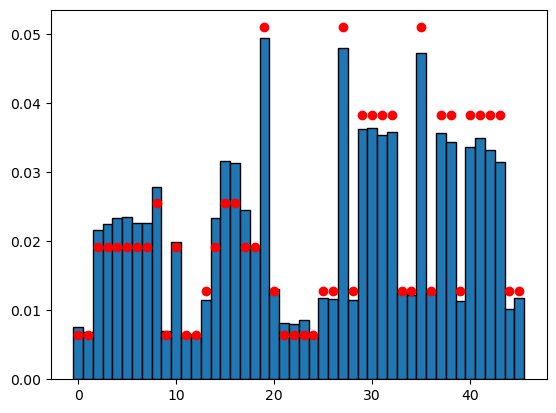

In [127]:
# Insert your code here.
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plot

M = load_chain('garbage-big.npy')

# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate trajectory
traj = simulate(M, u, 50000)
traj = list(map(int,traj))

# Get stationary distribution
u_star = stationary_dist(M)


plot.hist(traj, range(0, nS + 1), density=True, edgecolor = 'black', align='left') # empirical distribution
plot.scatter(range(0, nS), u_star, color='red') # theoretical distribution